# Project 4 - Happiness in Western Europe

In [1]:
# Libraries
import numpy as np
import pandas as pd
from functools import partial, reduce
from sklearn import linear_model
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest

## 1. Cleaning Happiness data

In [2]:
happiness2015=pd.read_csv('data/2015.csv')
happiness2016=pd.read_csv('data/2016.csv')
happiness2017=pd.read_csv('data/2017.csv')
happiness2018=pd.read_csv('data/2018.csv')
happiness2019=pd.read_csv('data/2019.csv')
happiness2020=pd.read_csv('data/2020.csv')

In [3]:
happiness2015.rename({'Economy (GDP per Capita)': 'GDP per capita','Family':'Social support','Health (Life Expectancy)':'Healthy Life expectancy',
                     'Trust (Government Corruption)':'Perceptions of corruption'}, axis = 1, inplace=True)
happiness2015['Year']='2015'
happiness2016.rename({'Economy (GDP per Capita)': 'GDP per capita','Family':'Social support','Health (Life Expectancy)':'Healthy Life expectancy',
                      'Trust (Government Corruption)':'Perceptions of corruption'}, axis = 1, inplace= True)
happiness2016['Year']='2016'
happiness2017.rename({'Happiness.Rank':'Happiness Rank','Family':'Social support','Health..Life.Expectancy.':'Healthy Life expectancy',
                     'Economy..GDP.per.Capita.':'GDP per capita','Happiness.Score': 'Happiness Score',
                     'Trust..Government.Corruption.':'Perceptions of corruption'}, axis = 1, inplace=True)
happiness2017['Year']='2017'
happiness2018.rename({'Country or region':'Country','Overall rank':'Happiness Rank','Family':'Social support','Healthy life expectancy':'Healthy Life expectancy',
                      'Freedom to make life choices':'Freedom', 'Score':'Happiness Score'}, axis = 1, inplace=True)
happiness2018['Year']='2018'
happiness2019.rename({'Country or region':'Country','Overall rank':'Happiness Rank','Freedom to make life choices':'Freedom','Healthy life expectancy':'Healthy Life expectancy',
                      'Freedom to make life choices':'Freedom', 'Score':'Happiness Score'}, axis = 1, inplace=True)
happiness2019['Year']='2019'
happiness2020.rename({'Country name':'Country', 'Ladder score':'Happiness Score', 'Explained by: Healthy life expectancy':'Healthy Life expectancy',
                      'Freedom to make life choices':'Freedom','Explained by: Log GDP per capita':'GDP per capita',
                     'Regional indicator':'Region'}, axis = 1, inplace=True)
happiness2020['Year']='2020'

In [4]:
happiness = pd.concat([happiness2020,happiness2019,happiness2018,happiness2017,happiness2016,happiness2015])

In [5]:
happiness['Year'].value_counts()

2015    158
2016    157
2018    156
2019    156
2017    155
2020    153
Name: Year, dtype: int64

In [6]:
europe = happiness2020[happiness2020['Region']=='Western Europe']

In [7]:
list_euro_countries = list(europe['Country'])

In [8]:
europe_west= happiness[happiness["Country"].isin(list_euro_countries)]

In [9]:
europe_west['Year'].value_counts()

2017    21
2020    21
2016    21
2015    21
2018    20
2019    20
Name: Year, dtype: int64

In [10]:
europe_west.columns

Index(['Country', 'Region', 'Happiness Score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom', 'Generosity', 'Perceptions of corruption',
       'Ladder score in Dystopia', 'GDP per capita',
       'Explained by: Social support', 'Healthy Life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual', 'Year', 'Happiness Rank', 'Whisker.high',
       'Whisker.low', 'Dystopia.Residual', 'Lower Confidence Interval',
       'Upper Confidence Interval', 'Dystopia Residual', 'Standard Error'],
      dtype='object')

In [11]:
europe_west.drop(columns=[
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker','Region',
       'Logged GDP per capita','Ladder score in Dystopia','Explained by: Social support', 'Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual','Happiness Rank', 'Whisker.high',
       'Whisker.low', 'Dystopia.Residual', 'Lower Confidence Interval',
       'Upper Confidence Interval', 'Dystopia Residual', 'Standard Error'], inplace=True)

C:\Users\Filipe Miguel Santos\anaconda3\envs\main\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [12]:
# save dataset

## 2. Cleaning Mental Health Disorders Dataset

In [13]:
#cleaned dataset
euro= pd.read_csv('data/euro_happiness.csv')

In [14]:
#datasets
anxiety = pd.read_csv('data/anxiety.csv')
depression = pd.read_csv('data/depression2017.csv')
suicide = pd.read_csv('data/suicide2017.csv')
drinks16 = pd.read_csv('data/alcohol2016.csv')
alcohol = pd.read_csv('data/share-alcohol-disorder.csv')

In [15]:
#renaming columns
anxiety.rename(columns={'Entity':'Country','Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent)': '% people with anxiety'}, inplace=True)
depression.rename(columns={'Entity':'Country','Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)': '% people with depression'}, inplace=True)
suicide.rename(columns={'Entity':'Country','Deaths - Self-harm - Sex: Both - Age: Age-standardized (Rate)': 'Deaths per 100k ind'}, inplace=True)
alcohol.rename(columns={'Entity':'Country','Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)': '% of alcoholic people'}, inplace=True)
drinks16.rename(columns={'Entity':'Country','Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)': 'ltrs of pure alcohol per person'}, inplace=True)

In [16]:
drinks16['Year'] = 2016

### 2.1 Data Compilation

In [17]:
dfs = [euro,anxiety,depression,suicide,alcohol]
all_info = partial(pd.merge, on=['Country', 'Year'], how='inner')
all_info_15_17=reduce(all_info, dfs)

In [18]:
# Save Dataset

## 3. Data correlation

### 3.1 Happiness and Mental Health Disorders

In [19]:
compiled = pd.read_csv('data/compiled1517.csv')
compiled.drop(columns=['Unnamed: 0','Code_x', 'Code_y', 'Code_x.1', 'Code_y.1'], inplace=True)

In [20]:
countries_results = compiled.groupby('Country').mean()

In [21]:
countries_results.drop(columns='Year', inplace=True)

In [22]:
countries_results.sort_values('Happiness Score', ascending=False)

,Happiness Score,Social support,Freedom,Generosity,Perceptions of corruption,GDP per capita,Healthy Life expectancy,% people with anxiety,% people with depression,Deaths per 100k ind,% of alcoholic people
Country,,,,,,,,,,,
Switzerland,7.530000,1.337221,0.623737,0.289386,0.399606,1.496273,0.887530,5.357443,3.714734,9.571511,1.379000
Denmark,7.525000,1.358481,0.618266,0.352793,0.442957,1.416548,0.820749,5.315054,3.286278,8.638111,1.746309
Iceland,7.522000,1.398688,0.607391,0.462873,0.148242,1.403204,0.882907,5.292782,3.360854,9.760969,1.240199
Norway,7.519000,1.330458,0.633748,0.362651,0.346251,1.550968,0.825889,7.590861,3.725782,9.267757,1.422047
Finland,7.429333,1.331049,0.610227,0.244638,0.402124,1.379934,0.836393,3.750899,4.825395,12.762537,2.655555
Netherlands,7.364667,1.246076,0.584418,0.473583,0.300024,1.432688,0.838615,6.599359,4.028124,9.232707,0.765421
Sweden,7.313000,1.284957,0.618301,0.376853,0.410503,1.425969,0.857652,5.295360,4.500592,11.314970,1.655875
Austria,7.108333,1.280272,0.578549,0.325334,0.207100,1.424902,0.837133,5.342679,3.262538,11.464393,1.854415
Ireland,6.941333,1.363094,0.576987,0.445499,0.294319,1.451692,0.839888,5.836675,4.268983,8.493623,2.117281


In [23]:
countries_results.columns

Index(['Happiness Score', 'Social support', 'Freedom', 'Generosity',
       'Perceptions of corruption', 'GDP per capita',
       'Healthy Life expectancy', '% people with anxiety',
       '% people with depression', 'Deaths per 100k ind',
       '% of alcoholic people'],
      dtype='object')

In [24]:
X = countries_results[['Social support', 'Freedom', 'Generosity',
       'Perceptions of corruption', 'GDP per capita',
       'Healthy Life expectancy', '% people with anxiety',
       '% people with depression', 'Deaths per 100k ind',
       '% of alcoholic people']]
y = countries_results['Happiness Score']

regr = linear_model.LinearRegression()
regr.fit(X, y)

print(regr.coef_)

[ 1.82419154 -0.94080023  1.49280885  3.23216502 -0.4308586   3.98856468
  0.08411582 -0.34575079  0.09740704  0.00932489]


In [25]:
countries_results.sort_values('% people with depression', ascending=False).head(7)

,Happiness Score,Social support,Freedom,Generosity,Perceptions of corruption,GDP per capita,Healthy Life expectancy,% people with anxiety,% people with depression,Deaths per 100k ind,% of alcoholic people
Country,,,,,,,,,,,
Finland,7.429333,1.331049,0.610227,0.244638,0.402124,1.379934,0.836393,3.750899,4.825395,12.762537,2.655555
Sweden,7.313000,1.284957,0.618301,0.376853,0.410503,1.425969,0.857652,5.295360,4.500592,11.314970,1.655875
Portugal,5.140000,1.150021,0.486808,0.116401,0.013953,1.250385,0.821555,5.381124,4.492526,7.702596,1.269776
France,6.498333,1.217746,0.495317,0.124894,0.185681,1.367861,0.876069,6.632070,4.277097,12.636169,1.439061
Ireland,6.941333,1.363094,0.576987,0.445499,0.294319,1.451692,0.839888,5.836675,4.268983,8.493623,2.117281
Greece,5.039000,0.974492,0.076980,0.000000,0.032843,1.230802,0.830873,5.794488,4.208629,3.572457,1.128189
United Kingdom,6.768667,1.289553,0.534933,0.504485,0.286696,1.370278,0.841559,4.653082,4.122148,7.332539,1.906313


In [26]:
countries_results.sort_values('% people with anxiety', ascending=False).head(7)

,Happiness Score,Social support,Freedom,Generosity,Perceptions of corruption,GDP per capita,Healthy Life expectancy,% people with anxiety,% people with depression,Deaths per 100k ind,% of alcoholic people
Country,,,,,,,,,,,
Norway,7.519000,1.330458,0.633748,0.362651,0.346251,1.550968,0.825889,7.590861,3.725782,9.267757,1.422047
France,6.498333,1.217746,0.495317,0.124894,0.185681,1.367861,0.876069,6.632070,4.277097,12.636169,1.439061
Netherlands,7.364667,1.246076,0.584418,0.473583,0.300024,1.432688,0.838615,6.599359,4.028124,9.232707,0.765421
Germany,6.898333,1.289877,0.570647,0.307643,0.260224,1.421238,0.835227,6.551748,3.951890,9.837827,1.869481
Ireland,6.941333,1.363094,0.576987,0.445499,0.294319,1.451692,0.839888,5.836675,4.268983,8.493623,2.117281
Greece,5.039000,0.974492,0.076980,0.000000,0.032843,1.230802,0.830873,5.794488,4.208629,3.572457,1.128189
Italy,5.963000,1.228121,0.235694,0.189287,0.027533,1.333719,0.886208,5.628315,3.460950,4.918204,0.464408


In [27]:
countries_results.sort_values('Deaths per 100k ind', ascending=False).head(7)

,Happiness Score,Social support,Freedom,Generosity,Perceptions of corruption,GDP per capita,Healthy Life expectancy,% people with anxiety,% people with depression,Deaths per 100k ind,% of alcoholic people
Country,,,,,,,,,,,
Belgium,6.919000,1.266821,0.545937,0.232134,0.246408,1.398997,0.844784,5.210581,4.109730,14.535707,1.460966
Finland,7.429333,1.331049,0.610227,0.244638,0.402124,1.379934,0.836393,3.750899,4.825395,12.762537,2.655555
France,6.498333,1.217746,0.495317,0.124894,0.185681,1.367861,0.876069,6.632070,4.277097,12.636169,1.439061
Austria,7.108333,1.280272,0.578549,0.325334,0.207100,1.424902,0.837133,5.342679,3.262538,11.464393,1.854415
Sweden,7.313000,1.284957,0.618301,0.376853,0.410503,1.425969,0.857652,5.295360,4.500592,11.314970,1.655875
Germany,6.898333,1.289877,0.570647,0.307643,0.260224,1.421238,0.835227,6.551748,3.951890,9.837827,1.869481
Iceland,7.522000,1.398688,0.607391,0.462873,0.148242,1.403204,0.882907,5.292782,3.360854,9.760969,1.240199


<AxesSubplot:xlabel='Happiness Score', ylabel='GDP per capita'>

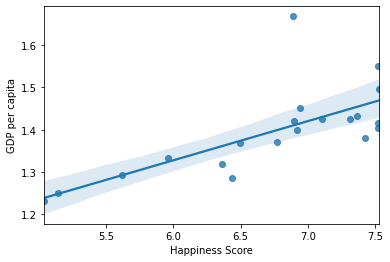

In [28]:
sns.regplot(x = "Happiness Score", y = "GDP per capita", data = countries_results)

<AxesSubplot:xlabel='Happiness Score', ylabel='Deaths per 100k ind'>

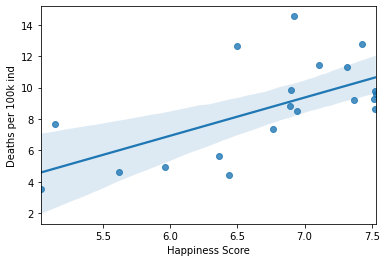

In [29]:
sns.regplot(x = "Happiness Score", y = "Deaths per 100k ind", data = countries_results)

### 3.2 Happiness and Alcohol consumption

In [30]:
consumption = pd.read_csv('data/alcohol2016.csv')
happiness = pd.read_csv('data/2016.csv')

In [31]:
happiness_eu = happiness[happiness['Region']=='Western Europe']

In [32]:
consumption.rename(columns={'Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)':'ltrs of pure alcohol consumed', 'Entity': 'Country'}, inplace = True)

In [33]:
consumption

,Country,Code,ltrs of pure alcohol consumed
0,Afghanistan,AFG,0.200000
1,Albania,ALB,7.500000
2,Algeria,DZA,0.900000
3,Andorra,AND,11.300000
4,Angola,AGO,6.400000
...,...,...,...
228,Vietnam,VNM,8.300000
229,World,OWID_WRL,6.376976
230,Yemen,YEM,0.100000
231,Zambia,ZMB,4.800000


In [34]:
hap_alc = happiness_eu.merge(consumption,on=['Country'], how='inner')

In [35]:
hap_alc

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Code,ltrs of pure alcohol consumed
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,DNK,10.4
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,CHE,11.5
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,ISL,9.1
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465,NOR,7.5
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596,FIN,10.7
5,Netherlands,Western Europe,7,7.339,7.284,7.394,1.46468,1.02912,0.81231,0.55211,0.29927,0.47416,2.70749,NLD,8.7
6,Sweden,Western Europe,10,7.291,7.227,7.355,1.45181,1.08764,0.83121,0.58218,0.40867,0.38254,2.54734,SWE,9.2
7,Austria,Western Europe,12,7.119,7.045,7.193,1.45038,1.08383,0.80565,0.54355,0.21348,0.32865,2.69343,AUT,11.6
8,Germany,Western Europe,16,6.994,6.930,7.058,1.44787,1.09774,0.81487,0.53466,0.28551,0.30452,2.50931,DEU,13.4
9,Belgium,Western Europe,18,6.929,6.861,6.997,1.42539,1.05249,0.81959,0.51354,0.26248,0.24240,2.61355,BEL,12.1


<AxesSubplot:xlabel='Happiness Score', ylabel='ltrs of pure alcohol consumed'>

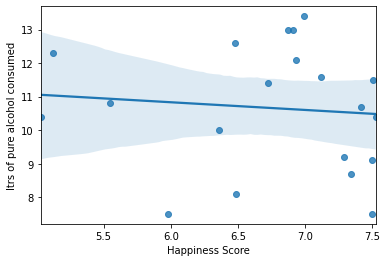

In [36]:
# Correlation between happiness Score and alcohol consumption
sns.regplot(x = "Happiness Score", y = "ltrs of pure alcohol consumed", data =hap_alc)

In [37]:
alcoholic = pd.read_csv('data/share-alcohol-disorder.csv')

In [38]:
alcohol16 = alcoholic[alcoholic['Year']==2016]
alcohol16.rename(columns = {'Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)': 'Alcohol disorder', 'Entity':'Country'}, inplace=True) 

C:\Users\Filipe Miguel Santos\anaconda3\envs\main\lib\site-packages\pandas\core\frame.py:4304: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [39]:
alcoholic_cons = hap_alc.merge(alcohol16,on=['Country'], how='inner')

In [40]:
alcoholic_cons.drop(columns=['Code_x','Code_y'])

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,ltrs of pure alcohol consumed,Year,Alcohol disorder
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,10.4,2016,1.747206
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,11.5,2016,1.378729
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,9.1,2016,1.240083
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465,7.5,2016,1.422242
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596,10.7,2016,2.657734
5,Netherlands,Western Europe,7,7.339,7.284,7.394,1.46468,1.02912,0.81231,0.55211,0.29927,0.47416,2.70749,8.7,2016,0.765080
6,Sweden,Western Europe,10,7.291,7.227,7.355,1.45181,1.08764,0.83121,0.58218,0.40867,0.38254,2.54734,9.2,2016,1.659861
7,Austria,Western Europe,12,7.119,7.045,7.193,1.45038,1.08383,0.80565,0.54355,0.21348,0.32865,2.69343,11.6,2016,1.855808
8,Germany,Western Europe,16,6.994,6.930,7.058,1.44787,1.09774,0.81487,0.53466,0.28551,0.30452,2.50931,13.4,2016,1.874791
9,Belgium,Western Europe,18,6.929,6.861,6.997,1.42539,1.05249,0.81959,0.51354,0.26248,0.24240,2.61355,12.1,2016,1.460782


<AxesSubplot:xlabel='Alcohol disorder', ylabel='ltrs of pure alcohol consumed'>

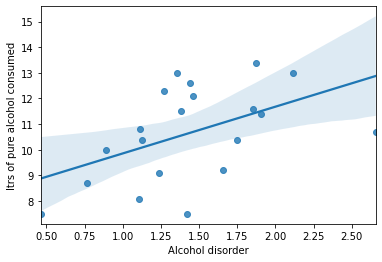

In [41]:
sns.regplot(x = "Alcohol disorder", y = "ltrs of pure alcohol consumed", data =alcoholic_cons)

In [42]:
#save dataframe

## 4. Hypothesis Tests

In [43]:
# import saved DataFrames
west_euro1517 = pd.read_csv('data/agg_countries.csv')
euro_happiness = pd.read_csv('data/euro_happiness.csv')

In [44]:
west_euro1517.set_index('Country', inplace=True)
euro_happiness.set_index('Country', inplace=True)

In [45]:
med_countries = ['Portugal','Spain','Greece','Italy']
sca_countries = ['Sweden', 'Norway', 'Denmark','Finland']

In [46]:
#Hypothesis test for Happiness Score between scandinavian and mediterranean countries
stats.ttest_ind(euro_happiness.loc[med_countries,'Happiness Score'],euro_happiness.loc[sca_countries,'Happiness Score'])

Ttest_indResult(statistic=-15.662044545553613, pvalue=4.6499974188473327e-20)

In [47]:
portugal_pop = 10000000
spain_pop = 47000000
greece_pop = 11000000
italy_pop = 60000000
med_pop = portugal_pop+spain_pop+greece_pop+italy_pop

sweden_pop = 10000000
denmark_pop = 6000000
norway_pop = 5500000
finland_pop = 5500000
sca_pop=sweden_pop+denmark_pop+norway_pop+finland_pop

In [48]:
med = west_euro1517.loc[med_countries,'% people with depression']
med_weighted = med*np.array([portugal_pop/med_pop ,spain_pop/med_pop,greece_pop/med_pop,italy_pop/med_pop])
med_shared = med_weighted.sum()

In [49]:
sca = west_euro1517.loc[sca_countries,'% people with depression']
sca_weighted = med*np.array([sweden_pop/sca_pop,denmark_pop/sca_pop,norway_pop/sca_pop,finland_pop/sca_pop])
sca_shared = sca_weighted.sum()

In [50]:
sample_success_med, sample_size_med = (med_shared, 100)
sample_success_sca, sample_size_sca = (sca_shared, 100)
successes = np.array([sample_success_med, sample_success_sca])
samples = np.array([sample_size_med, sample_size_sca])

In [51]:
stat, pvalue = proportions_ztest(successes,samples)
pvalue

0.8883278876398661